In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [2]:
#Read CSV
url = "/home/lionel/Desktop/Malaysia_Crop/training.csv"
df = pd.read_csv(url)

In [3]:
# specify the names of the features (i.e. band names) and label
# feature names used to extract out features and define what bands

feature_names = ['B1','B10','B11', 'B2', 'B3','B4', 'B5', 'B6', 'B7']
label = "landcover"

In [4]:
# get the features and labels into separate variables
X = df[feature_names]
y = df[label]

In [5]:
y.value_counts()

0    300
1    300
2    300
Name: landcover, dtype: int64

In [6]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [9]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9911111111111112

In [10]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[75,  0,  0],
       [ 0, 75,  0],
       [ 2,  0, 73]])

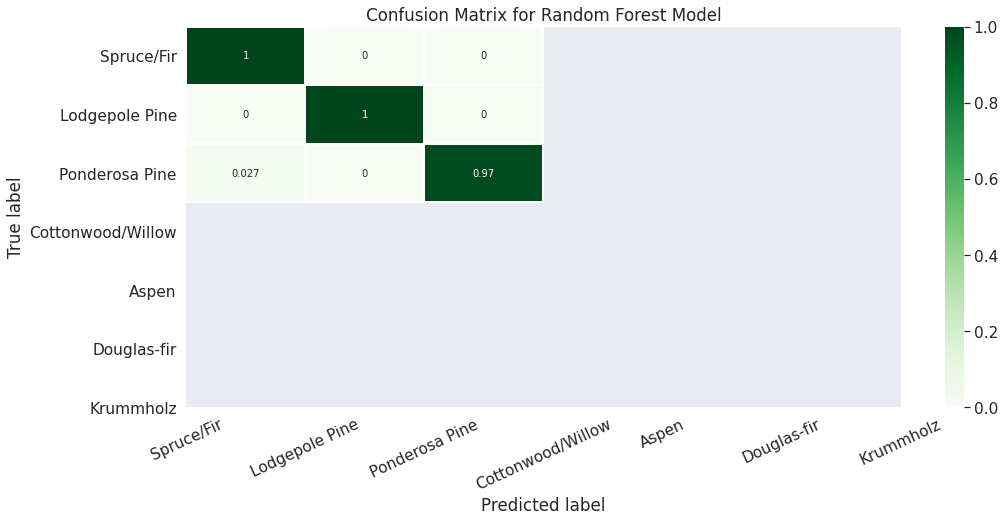

In [11]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [12]:
#import library and requirements of GEE
import ee
import geemap
import pandas as pd

from geemap import ml
from sklearn import ensemble

In [13]:
#initialize the map
geemap.ee_initialize()

In [14]:
# convert the estimator into a list of strings
# this function also works with the ensemble.ExtraTrees estimator
trees =  ml.rf_to_strings(forest,feature_names)

In [15]:
# print the first tree to see the result
print(trees[0])

1) root 436 9999 9999 (1.8609058266100624)
  2) B5 <= 0.228828 139 0.0000 1.000000 *
  3) B5 > 0.228828 436 0.6658 0.000000
    6) B7 <= 0.052087 297 0.5117 0.000000
      12) B11 <= 290.901596 159 0.1897 2.000000
        24) B11 <= 289.211365 1 0.0000 0.000000 *
        25) B11 > 289.211365 139 0.0000 2.000000 *
      13) B11 > 290.901596 19 0.0000 0.000000 *
    7) B7 > 0.052087 297 0.5117 0.000000
      14) B10 <= 296.711792 138 0.0697 0.000000
        28) B6 <= 0.152463 136 0.0183 0.000000
          56) B2 <= 0.097771 29 0.0000 0.000000 *
          57) B2 > 0.097771 37 0.0768 0.000000
            114) B2 <= 0.100243 2 0.0000 2.000000 *
            115) B2 > 0.100243 6 0.0000 0.000000 *
        29) B6 > 0.152463 99 0.0000 0.000000 *
      15) B10 > 296.711792 2 0.0000 1.000000 *



In [16]:
print(trees[1])

1) root 414 9999 9999 (2.8508466421252443)
  2) B1 <= 0.129961 414 0.6660 2.000000
    4) B10 <= 294.283600 276 0.4974 2.000000
      8) B7 <= 0.052176 142 0.0000 2.000000 *
      9) B7 > 0.052176 151 0.0917 2.000000
        18) B10 <= 294.108795 4 0.0000 0.000000 *
        19) B10 > 294.108795 9 0.3750 0.000000
          38) B6 <= 0.153127 2 0.0000 2.000000 *
          39) B6 > 0.153127 3 0.0000 0.000000 *
    5) B10 > 294.283600 276 0.4974 2.000000
      10) B10 <= 294.387650 125 0.0201 0.000000
        20) B11 <= 290.479507 3 0.0000 0.000000 *
        21) B11 > 290.479507 1 0.0000 2.000000 *
      11) B10 > 294.387650 121 0.0000 0.000000 *
  3) B1 > 0.129961 414 0.6660 2.000000
    6) B7 <= 0.073585 138 0.0915 1.000000
      12) B10 <= 293.340210 1 0.0000 0.000000 *
      13) B10 > 293.340210 132 0.0355 1.000000
        26) B6 <= 0.163020 130 0.0000 1.000000 *
        27) B6 > 0.163020 1 0.0000 0.000000 *
    7) B7 > 0.073585 138 0.0915 1.000000
      14) B7 <= 0.079537 5 0.0000 0.0

In [17]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)

In [19]:
# ee_classifier.getInfo()

In [20]:
# Make a cloud-free Landsat 8 TOA composite (from raw imagery).
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1');
# l8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA")


image = ee.Algorithms.Landsat.simpleComposite(
  collection= l8.filterDate('2018-01-01', '2021-01-31'),
  asFloat= True
)

In [21]:
classified = image.select(feature_names).classify(ee_classifier)

In [22]:
# display results
Map = geemap.Map(center=(6.155672,100.569649), zoom=11)
Map.addLayer(image,{"bands": ['B1', 'B5','B6'], "min":0.05, "max": 0.55, "gamma":1.5}, 'image')
Map.addLayer(classified, {"min": 0, "max": 2, "palette": ['red', 'green', 'blue']},'classification')

Map

Map(center=[6.155672, 100.569649], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [23]:
# import pickle
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(classified, open(filename, 'wb'))